## Part 1 (a) Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
train_df = pd.read_csv("./Hotel-A-train.csv")
validate_df = pd.read_csv("./Hotel-A-validation.csv")

### Data Dictionary

#### Dataset Description  

This dataset contains historical booking records from a prominent hotel chain operating three types of properties: Airport Hotels, Resorts, and City Hotels. It includes reservation details such as booking dates, check-in/check-out dates, booking channels, customer demographics, payment methods, and cancellation history.  

The dataset is designed to help analyze booking patterns, predict cancellations, and optimize revenue management strategies. By exploring this data, we aim to uncover insights into guest behavior, identify factors contributing to cancellations and no-shows, and develop data-driven solutions to enhance operational efficiency and revenue retention.

| Field Name              | Description |
|-------------------------|-------------|
| **Reservation_id**      | A unique booking ID. |
| **Gender**             | Gender of the reservation person. |
| **Age**                | Age of the reservation person (varies from 18 to 70). |
| **Ethnicity**          | Ethnicity of the reservation person (Latino, African American, Asian American, Caucasian). |
| **Educational_Level**  | Educational level of the reservation person (Mid-School, High-School, College, Grad). |
| **Income**            | Income of the reservation person (<25K, 25K–50K, 50K–100K, >100K). |
| **Country_region**    | Country region of the reservation person (North, South, East, West). |
| **Hotel_Type**        | Type of hotel reserved (City Hotels, Airport Hotels, Resorts). |
| **Expected_checkin**  | Expected check-in date. |
| **Expected_checkout** | Expected checkout date. |
| **Booking_date**      | Date of reservation. |
| **Adults**           | Number of adults in the reservation (each room accommodates up to 5 people including children, except babies). |
| **Children**         | Number of children in the reservation. |
| **Babies**           | Number of babies in the reservation. |
| **Meal_Type**        | Selected meal type (Bed and Breakfast - BB, Half-board - HB, Full Board - FB). |
| **Previous_Cancellations** | Indicates if the traveler canceled any previous reservations. |
| **Deposit_type**     | Type of deposit paid (Refundable full payment, Non-refundable full payment, or None). |
| **Booking_channel**  | The way the traveler booked the reservation (Direct, Online). |
| **Required_Car_Parking** | Indicates if any car parking reservations are needed. |
| **Reservation_Status** | Final status of the reservation: Check-in (1), Cancel (2), No-show (3). |
| **Use_Promotion**    | Indicates if the traveler used any promo codes or discounts. |
| **Discount_Rate**    | Discount rate applied, if any. |
| **Room_Rate**        | Room rate per night. |


In [6]:
train_df.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,M,40,Latino,High-School,<25K,North,City Hotel,2015-07-01,2015-07-02,...,BB,No,No,No Deposit,Online,Yes,check-out,Yes,0,106.440241
1,77491756,F,49,African American,High-School,50K -- 100K,East,Airport Hotels,2015-07-01,2015-07-02,...,BB,No,No,Non-Refundable,Online,Yes,check-out,No,0,158.039564
2,73747291,F,42,caucasian,College,<25K,East,Airport Hotels,2015-07-02,2015-07-06,...,BB,No,No,Refundable,Online,Yes,check-out,No,0,212.610780
3,67301739,M,25,Latino,High-School,>100K,South,City Hotel,2015-07-02,2015-07-03,...,BB,No,No,No Deposit,Agent,Yes,check-out,Yes,5,106.146407
4,77222321,F,62,African American,Grad,25K --50K,East,Airport Hotels,2015-07-03,2015-07-04,...,BB,No,No,Refundable,Direct,No,check-out,Yes,10,159.384439


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Reservation-id          27499 non-null  int64  
 1   Gender                  27499 non-null  object 
 2   Age                     27499 non-null  int64  
 3   Ethnicity               27499 non-null  object 
 4   Educational_Level       27499 non-null  object 
 5   Income                  27499 non-null  object 
 6   Country_region          27499 non-null  object 
 7   Hotel_Type              27499 non-null  object 
 8   Expected_checkin        27499 non-null  object 
 9   Expected_checkout       27499 non-null  object 
 10  Booking_date            27499 non-null  object 
 11  Adults                  27499 non-null  int64  
 12  Children                27499 non-null  int64  
 13  Babies                  22744 non-null  float64
 14  Meal_Type               27499 non-null

In [10]:
train_df.dtypes

Reservation-id              int64
Gender                     object
Age                         int64
Ethnicity                  object
Educational_Level          object
Income                     object
Country_region             object
Hotel_Type                 object
Expected_checkin           object
Expected_checkout          object
Booking_date               object
Adults                      int64
Children                    int64
Babies                    float64
Meal_Type                  object
Visted_Previously          object
Previous_Cancellations     object
Deposit_type               object
Booking_channel            object
Required_Car_Parking       object
Reservation_Status         object
Use_Promotion              object
Discount_Rate               int64
Room_Rate                 float64
dtype: object

In [12]:
train_df.duplicated().sum()

0

In [14]:
train_df.isna().sum()

Reservation-id               0
Gender                       0
Age                          0
Ethnicity                    0
Educational_Level            0
Income                       0
Country_region               0
Hotel_Type                   0
Expected_checkin             0
Expected_checkout            0
Booking_date                 0
Adults                       0
Children                     0
Babies                    4755
Meal_Type                    0
Visted_Previously            0
Previous_Cancellations       0
Deposit_type                 0
Booking_channel              0
Required_Car_Parking         0
Reservation_Status           0
Use_Promotion                0
Discount_Rate                0
Room_Rate                    0
dtype: int64

#### Handling Missing Values

In [17]:
train_df["Babies"].value_counts()

Babies
0.0    15920
1.0     5138
2.0     1686
Name: count, dtype: int64

In [19]:
missing_percentage = train_df.isnull().mean() * 100
missing_percentage

Reservation-id             0.000000
Gender                     0.000000
Age                        0.000000
Ethnicity                  0.000000
Educational_Level          0.000000
Income                     0.000000
Country_region             0.000000
Hotel_Type                 0.000000
Expected_checkin           0.000000
Expected_checkout          0.000000
Booking_date               0.000000
Adults                     0.000000
Children                   0.000000
Babies                    17.291538
Meal_Type                  0.000000
Visted_Previously          0.000000
Previous_Cancellations     0.000000
Deposit_type               0.000000
Booking_channel            0.000000
Required_Car_Parking       0.000000
Reservation_Status         0.000000
Use_Promotion              0.000000
Discount_Rate              0.000000
Room_Rate                  0.000000
dtype: float64

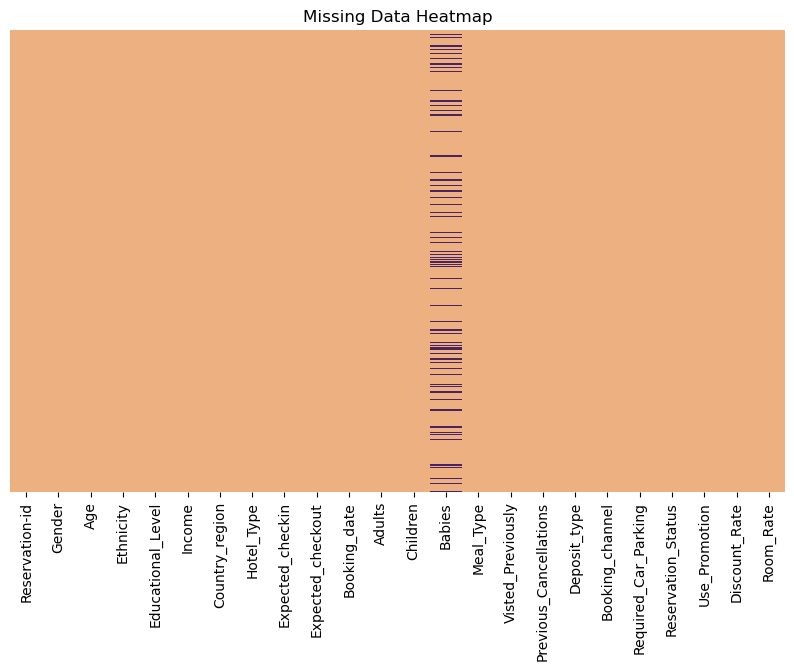

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cmap="flare", cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

#### The above diagram shows that data is missing Completely at Random. Therefore, mode imputation can be used

In [23]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')  
train_df[['Babies']] = imputer.fit_transform(train_df[['Babies']])

In [24]:
train_df.isna().sum()

Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Reservation_Status        0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64

In [25]:
train_df["Babies"].value_counts()

Babies
0.0    20675
1.0     5138
2.0     1686
Name: count, dtype: int64

In [26]:
train_df["Babies"] = train_df["Babies"].astype(int) 

In [27]:
train_df.dtypes

Reservation-id              int64
Gender                     object
Age                         int64
Ethnicity                  object
Educational_Level          object
Income                     object
Country_region             object
Hotel_Type                 object
Expected_checkin           object
Expected_checkout          object
Booking_date               object
Adults                      int64
Children                    int64
Babies                      int32
Meal_Type                  object
Visted_Previously          object
Previous_Cancellations     object
Deposit_type               object
Booking_channel            object
Required_Car_Parking       object
Reservation_Status         object
Use_Promotion              object
Discount_Rate               int64
Room_Rate                 float64
dtype: object

In [28]:
train_df["Expected_checkin"] = pd.to_datetime(train_df["Expected_checkin"])
train_df["Expected_checkout"] = pd.to_datetime(train_df["Expected_checkout"])
train_df["Booking_date"] = pd.to_datetime(train_df["Booking_date"])

In [29]:
train_df["Income"].value_counts()

Income
50K -- 100K    7936
25K --50K      7870
<25K           7739
>100K          3954
Name: count, dtype: int64

In [30]:
income_mapping = {
    "<25K": 0,
    "25K --50K": 1,
    "50K -- 100K": 2,
    ">100K": 3
}

train_df["Income"] = train_df["Income"].map(income_mapping)

In [31]:
train_df["Income"].value_counts()

Income
2    7936
1    7870
0    7739
3    3954
Name: count, dtype: int64

In [33]:
train_df.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,M,40,Latino,High-School,0,North,City Hotel,2015-07-01,2015-07-02,...,BB,No,No,No Deposit,Online,Yes,check-out,Yes,0,106.440241
1,77491756,F,49,African American,High-School,2,East,Airport Hotels,2015-07-01,2015-07-02,...,BB,No,No,Non-Refundable,Online,Yes,check-out,No,0,158.039564
2,73747291,F,42,caucasian,College,0,East,Airport Hotels,2015-07-02,2015-07-06,...,BB,No,No,Refundable,Online,Yes,check-out,No,0,212.610780
3,67301739,M,25,Latino,High-School,3,South,City Hotel,2015-07-02,2015-07-03,...,BB,No,No,No Deposit,Agent,Yes,check-out,Yes,5,106.146407
4,77222321,F,62,African American,Grad,1,East,Airport Hotels,2015-07-03,2015-07-04,...,BB,No,No,Refundable,Direct,No,check-out,Yes,10,159.384439


In [34]:
train_df["Deposit_type"].value_counts()

Deposit_type
No Deposit        14791
Non-Refundable     7941
Refundable         4767
Name: count, dtype: int64

In [35]:
train_df.dtypes

Reservation-id                     int64
Gender                            object
Age                                int64
Ethnicity                         object
Educational_Level                 object
Income                             int64
Country_region                    object
Hotel_Type                        object
Expected_checkin          datetime64[ns]
Expected_checkout         datetime64[ns]
Booking_date              datetime64[ns]
Adults                             int64
Children                           int64
Babies                             int32
Meal_Type                         object
Visted_Previously                 object
Previous_Cancellations            object
Deposit_type                      object
Booking_channel                   object
Required_Car_Parking              object
Reservation_Status                object
Use_Promotion                     object
Discount_Rate                      int64
Room_Rate                        float64
dtype: object

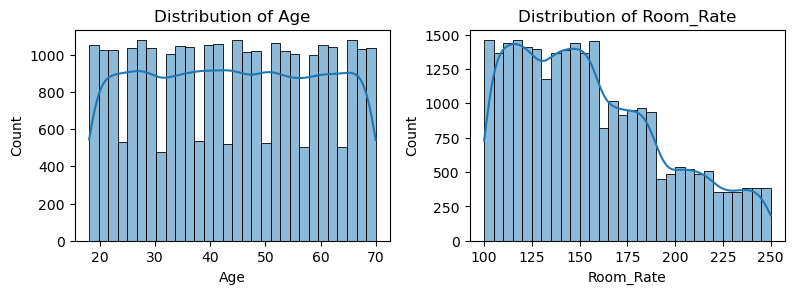

In [36]:
n_cols = ["Age", "Room_Rate"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(n_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(train_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.savefig("distribution_plot.png", dpi=300, bbox_inches="tight") 
plt.show()


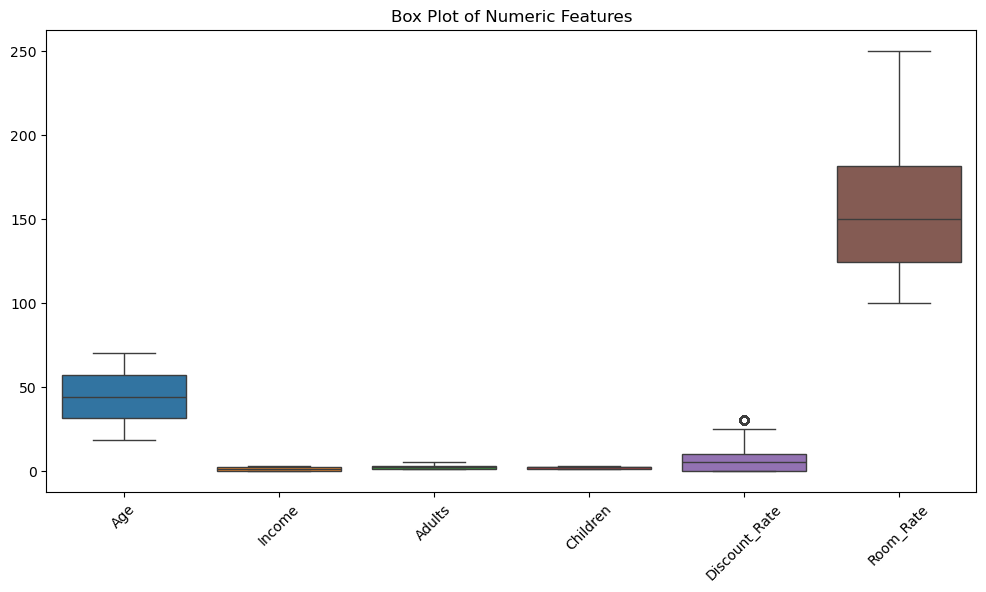

In [37]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = [col for col in train_df.select_dtypes(include=['int64', 'float64']).columns if col != 'Reservation-id']

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Box Plot of Numeric Features")
plt.savefig("Box Plot of Numeric Features", dpi=300, bbox_inches="tight") 
plt.show()


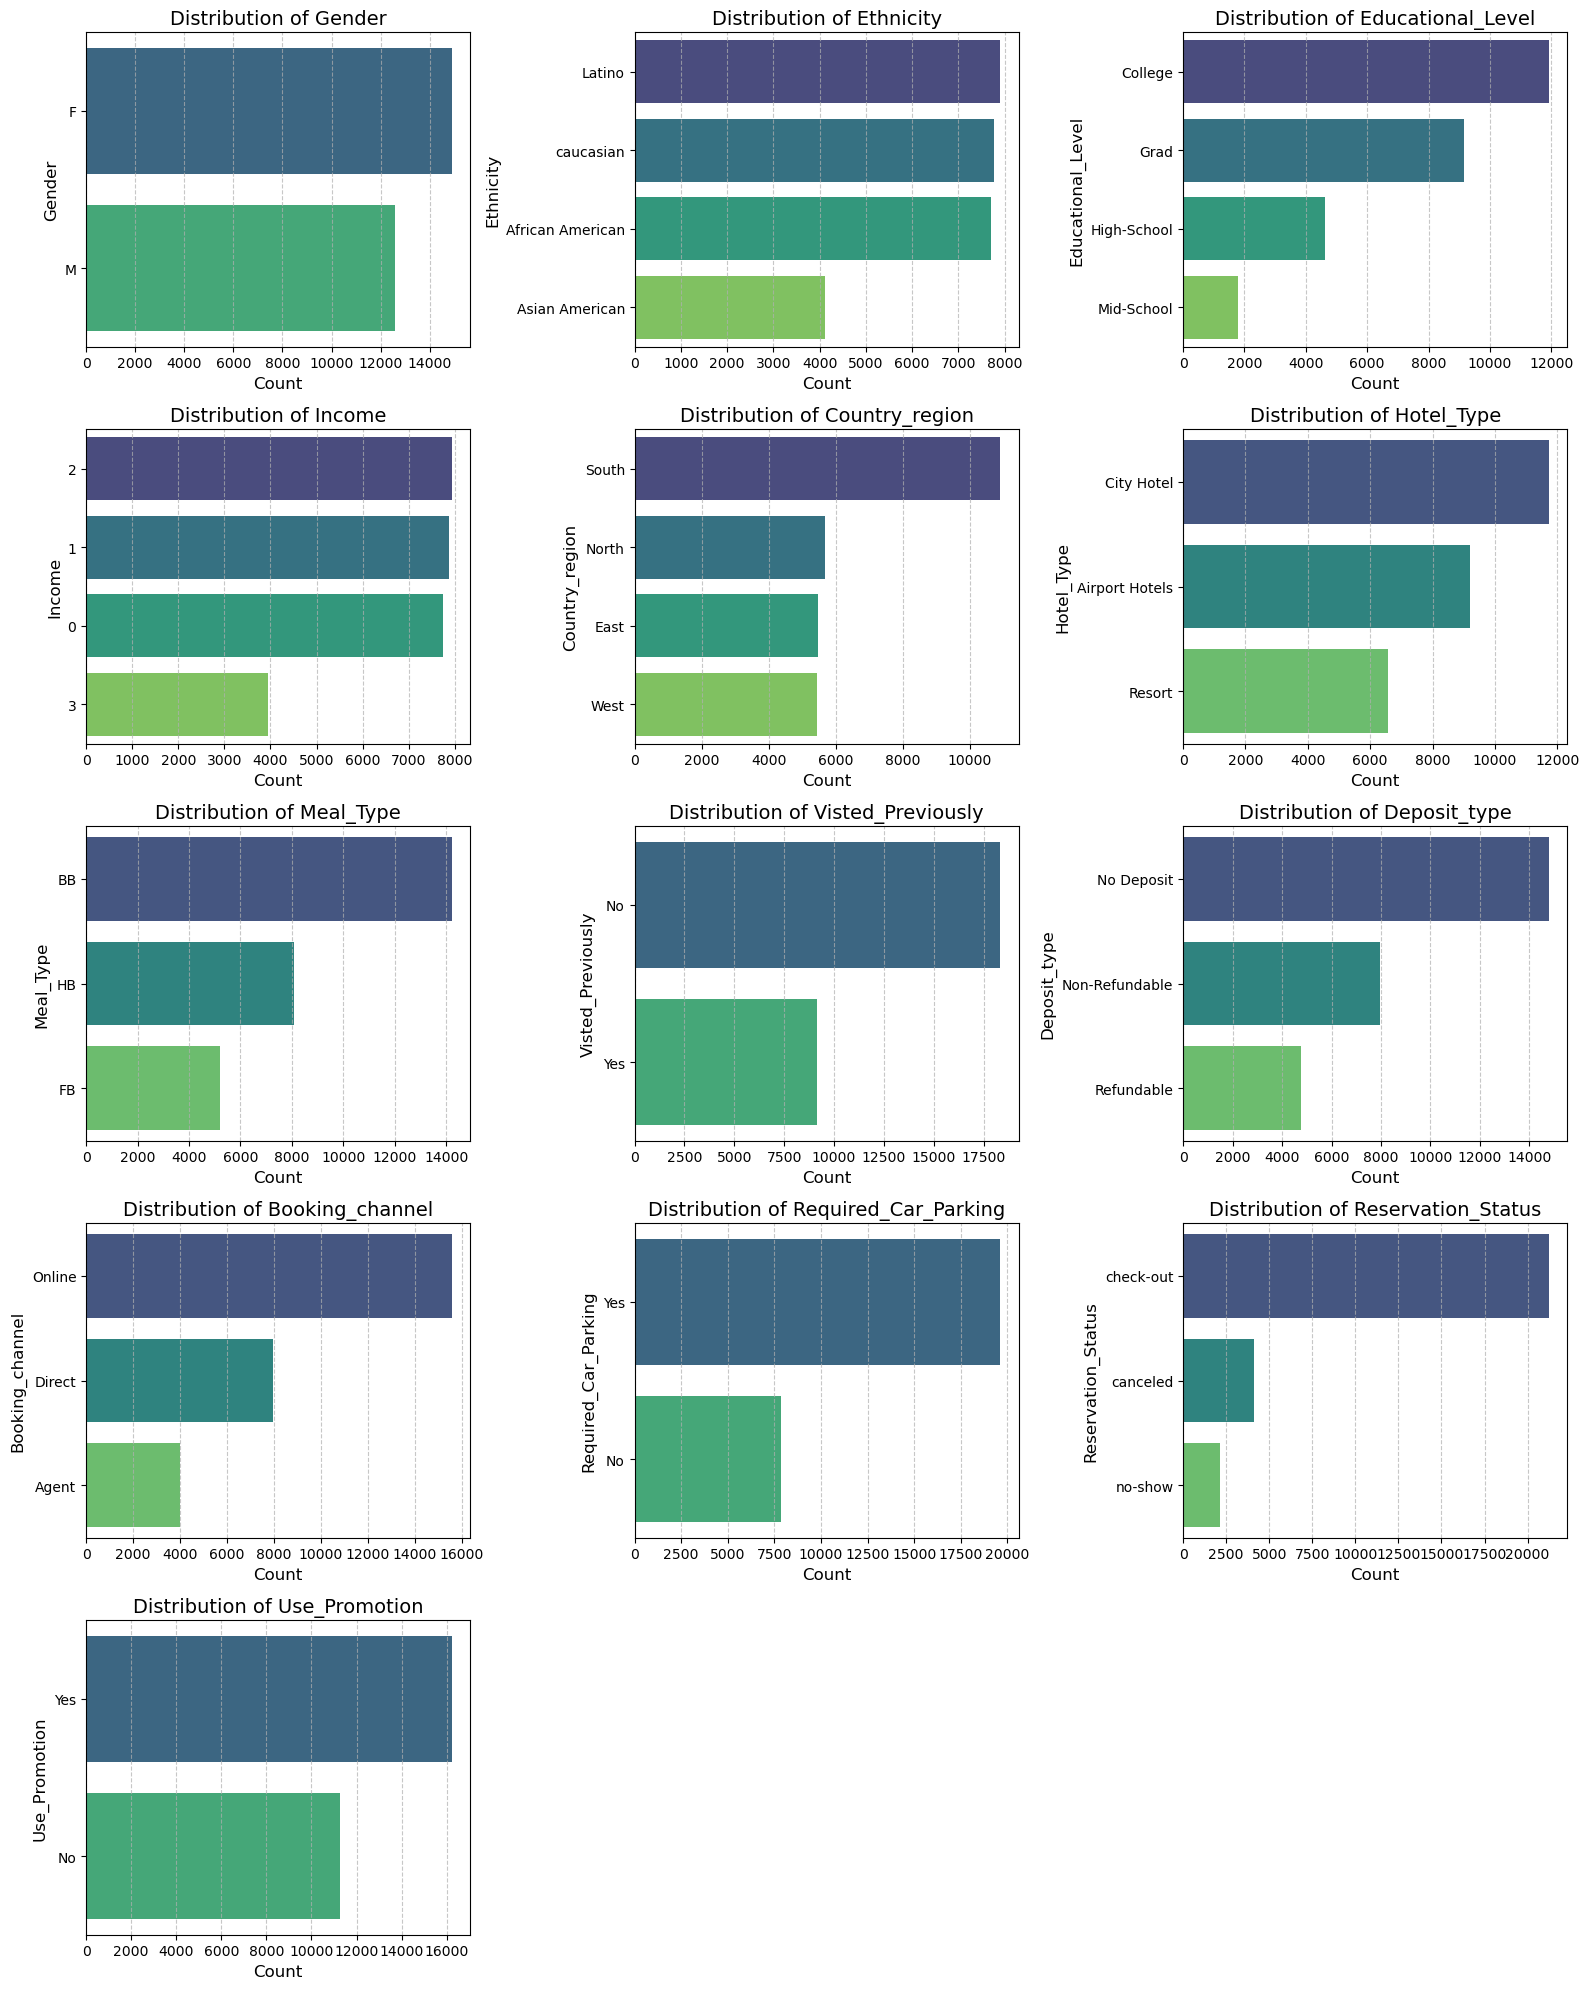

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

categorical_cols = ["Gender", "Ethnicity", "Educational_Level", "Income", "Country_region",
                    "Hotel_Type", "Meal_Type", "Visted_Previously", "Deposit_type",
                    "Booking_channel", "Required_Car_Parking", "Reservation_Status", "Use_Promotion"]

num_cols = 3  
num_rows = math.ceil(len(categorical_cols) / num_cols) 

plt.figure(figsize=(16, num_rows * 4))  

for i, col in enumerate(categorical_cols):  
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(y=train_df[col], order=train_df[col].value_counts().index, palette="viridis")  
    plt.ylabel(col, fontsize=12)
    plt.xlabel("Count", fontsize=12)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.grid(axis="x", linestyle="--", alpha=0.7)  

plt.tight_layout()
plt.savefig("categorical_distributions.png", dpi=300, bbox_inches="tight")  
plt.show()


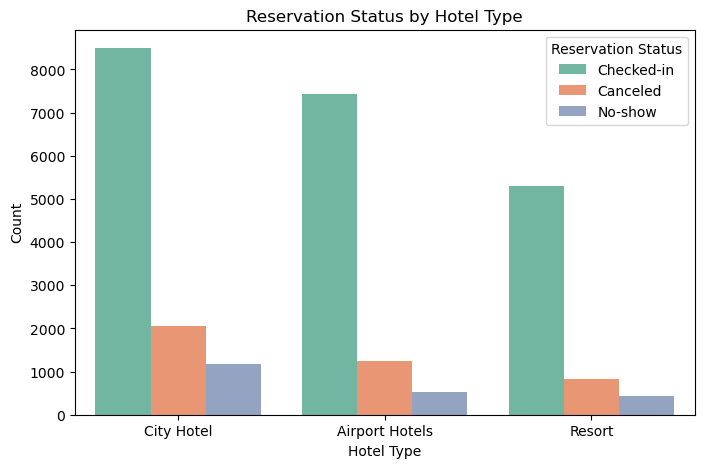

In [48]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x="Hotel_Type", hue="Reservation_Status", palette="Set2")
plt.title("Reservation Status by Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("Count")
plt.legend(title="Reservation Status", labels=["Checked-in", "Canceled", "No-show"])
plt.savefig("Reservation Status by Hotel Type", dpi=300, bbox_inches="tight")  
plt.show()

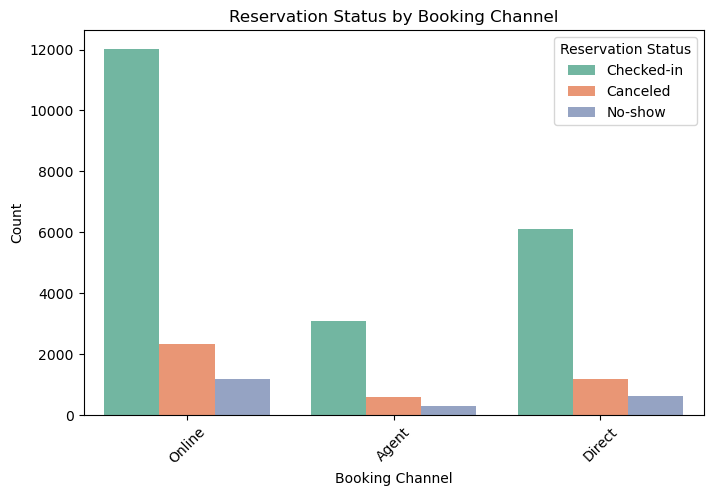

In [52]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x="Booking_channel", hue="Reservation_Status", palette="Set2")
plt.title("Reservation Status by Booking Channel")
plt.xlabel("Booking Channel")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Reservation Status", labels=["Checked-in", "Canceled", "No-show"])
plt.savefig("Reservation Status by Booking Channel", dpi=300, bbox_inches="tight")
plt.show()

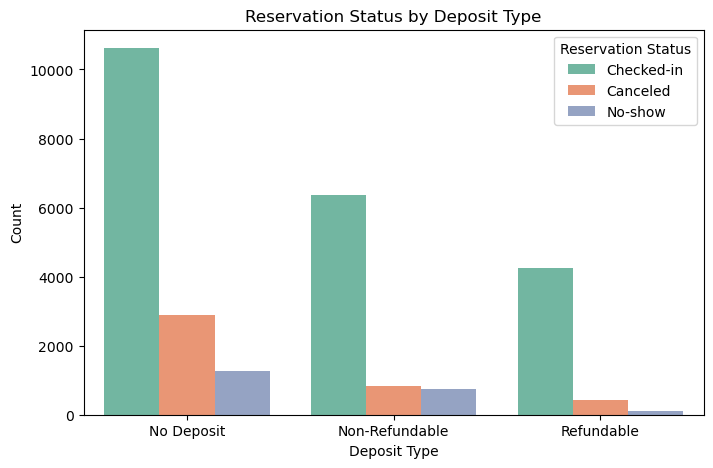

In [53]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x="Deposit_type", hue="Reservation_Status", palette="Set2")
plt.title("Reservation Status by Deposit Type")
plt.xlabel("Deposit Type")
plt.ylabel("Count")
plt.legend(title="Reservation Status", labels=["Checked-in", "Canceled", "No-show"])
plt.savefig("Reservation Status by Deposit Type", dpi=300, bbox_inches="tight")
plt.show()

<Figure size 1200x600 with 0 Axes>

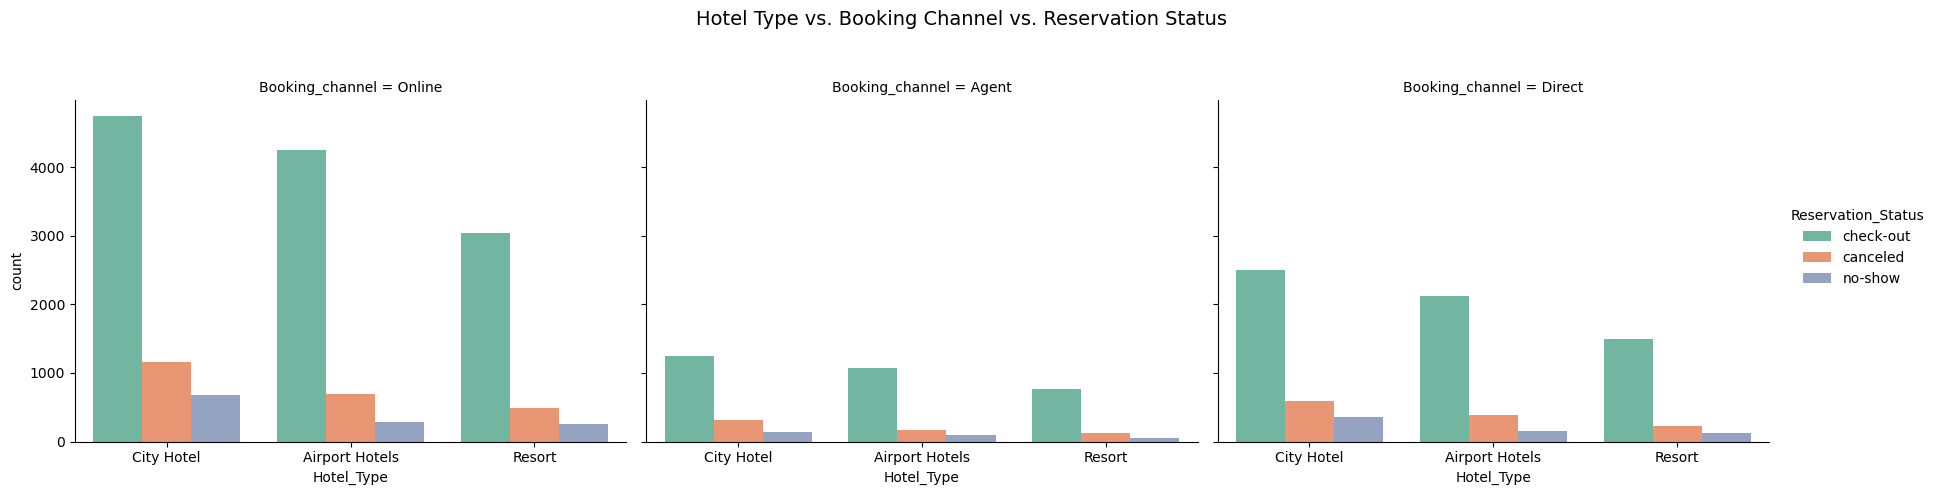

In [54]:
plt.figure(figsize=(12, 6))
sns.catplot(data=train_df, x="Hotel_Type", hue="Reservation_Status", col="Booking_channel", kind="count", height=5, aspect=1.2, palette="Set2")
plt.subplots_adjust(top=0.8)
plt.suptitle("Hotel Type vs. Booking Channel vs. Reservation Status", fontsize=14)
plt.show()

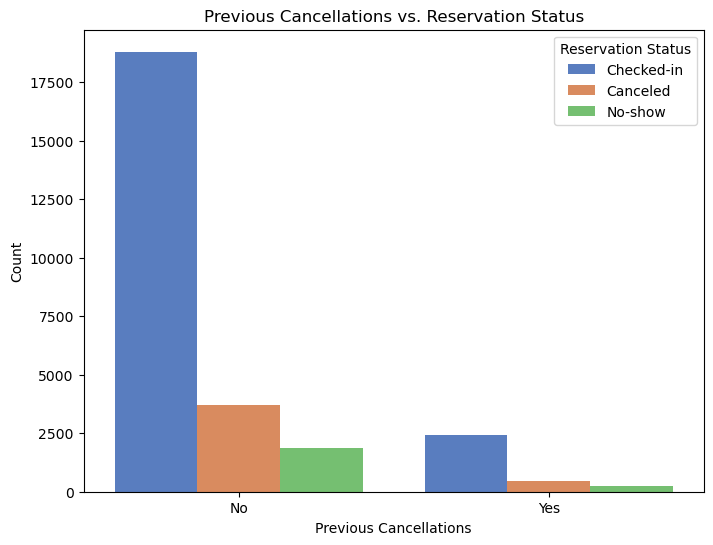

In [55]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x="Previous_Cancellations", hue="Reservation_Status", palette="muted")
plt.title("Previous Cancellations vs. Reservation Status")
plt.xlabel("Previous Cancellations")
plt.ylabel("Count")
plt.legend(title="Reservation Status", labels=["Checked-in", "Canceled", "No-show"])
plt.show()

<Figure size 1200x600 with 0 Axes>

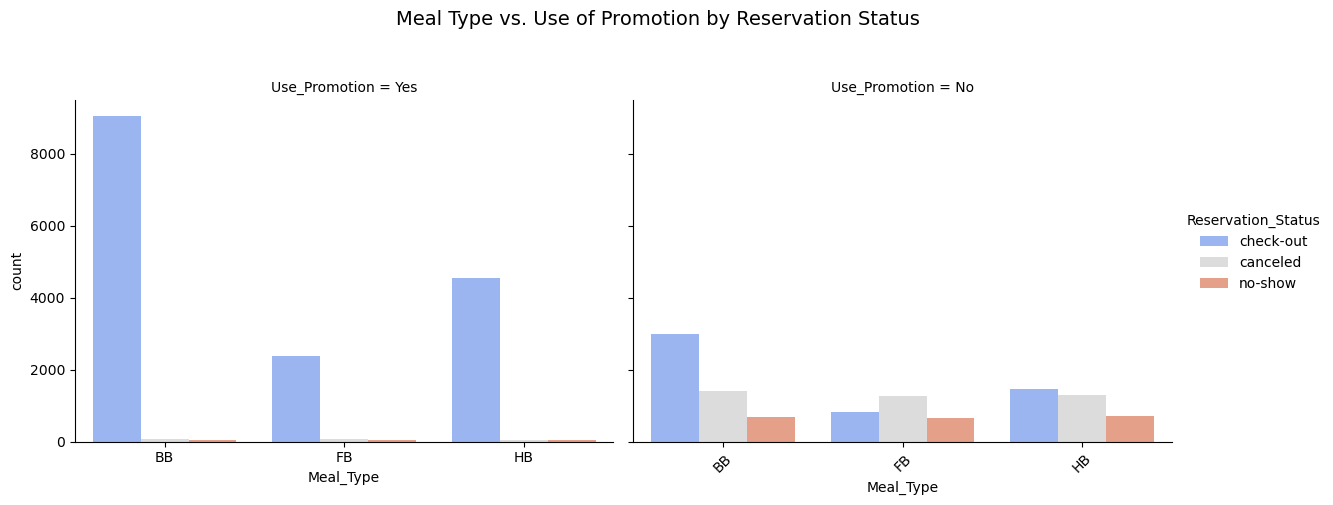

In [56]:
plt.figure(figsize=(12, 6))
sns.catplot(data=train_df, x="Meal_Type", hue="Reservation_Status", col="Use_Promotion", kind="count", height=5, aspect=1.2, palette="coolwarm")
plt.subplots_adjust(top=0.8)
plt.suptitle("Meal Type vs. Use of Promotion by Reservation Status", fontsize=14)
plt.xticks(rotation=45)
plt.show()

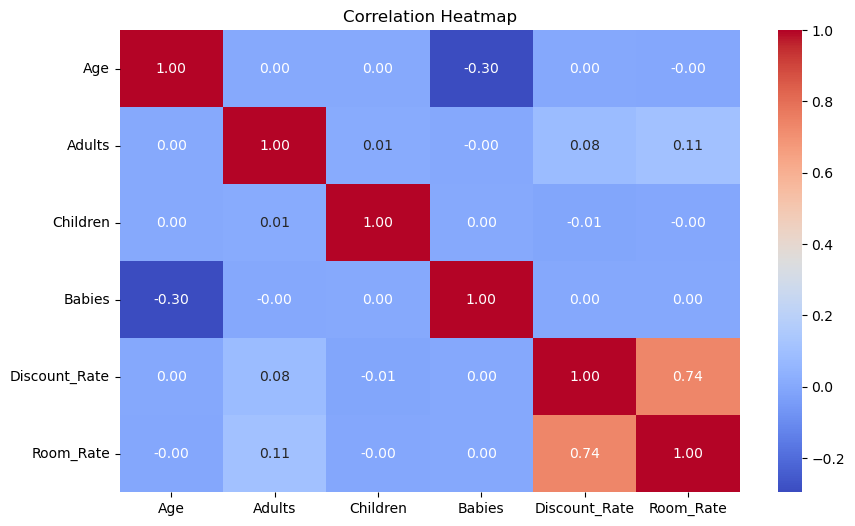

In [57]:
numeric_cols = ["Age","Adults", "Children", "Babies" ,"Discount_Rate", "Room_Rate"]
plt.figure(figsize=(10, 6))
sns.heatmap(train_df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("Correlation", dpi=300, bbox_inches="tight")
plt.show()

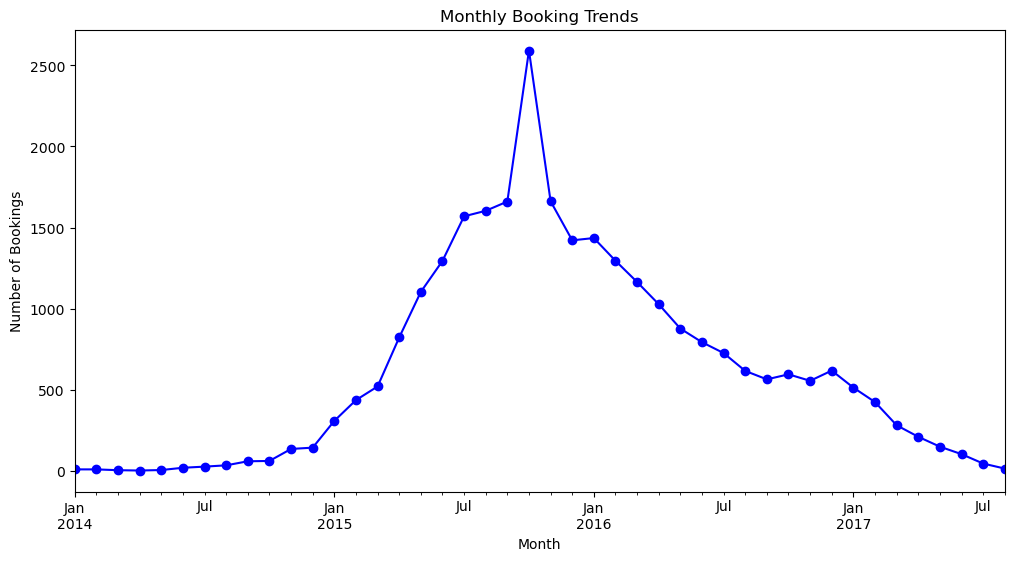

In [58]:
plt.figure(figsize=(12, 6))
train_df.resample('M', on='Booking_date').size().plot(kind='line', marker='o', color='b')
plt.title("Monthly Booking Trends")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.savefig("Monthly Booking Trends", dpi=300, bbox_inches="tight")
plt.show()

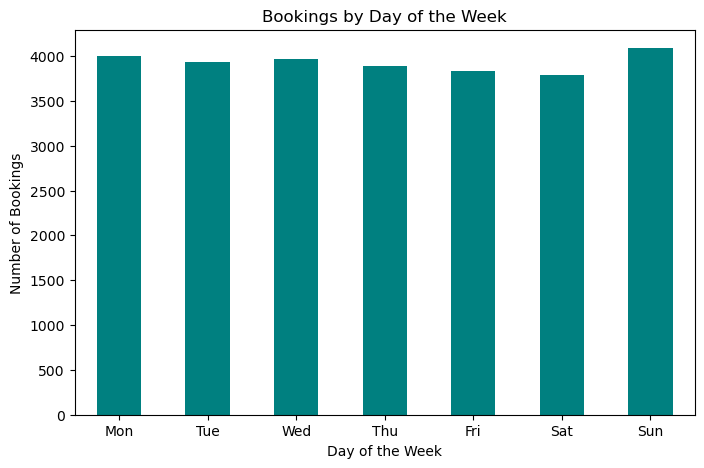

In [59]:
plt.figure(figsize=(8, 5))
train_df["Booking_date"].dt.dayofweek.value_counts().sort_index().plot(kind="bar", color="teal")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], rotation=0)
plt.title("Bookings by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Bookings")
plt.savefig("Bookings by Day of Week", dpi=300, bbox_inches="tight")
plt.show()


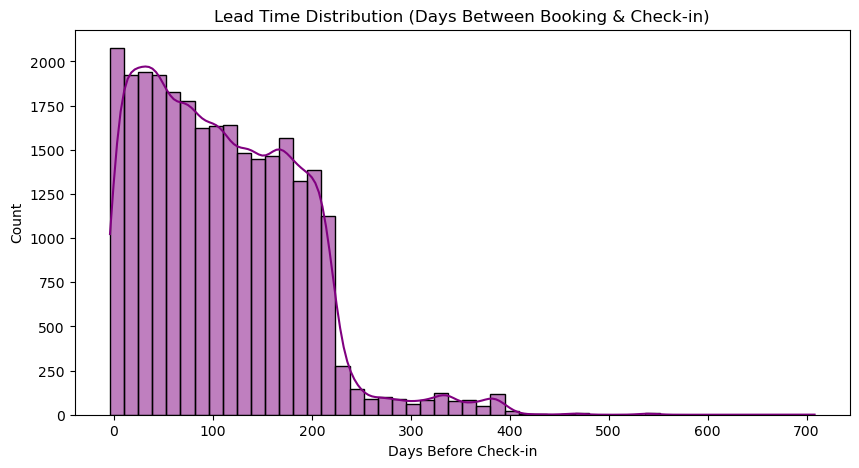

In [60]:
plt.figure(figsize=(10, 5))
sns.histplot((train_df["Expected_checkin"] - train_df["Booking_date"]).dt.days, bins=50, kde=True, color="purple")
plt.title("Lead Time Distribution (Days Between Booking & Check-in)")
plt.xlabel("Days Before Check-in")
plt.savefig("Lead time Distributon", dpi=300, bbox_inches="tight")
plt.show()


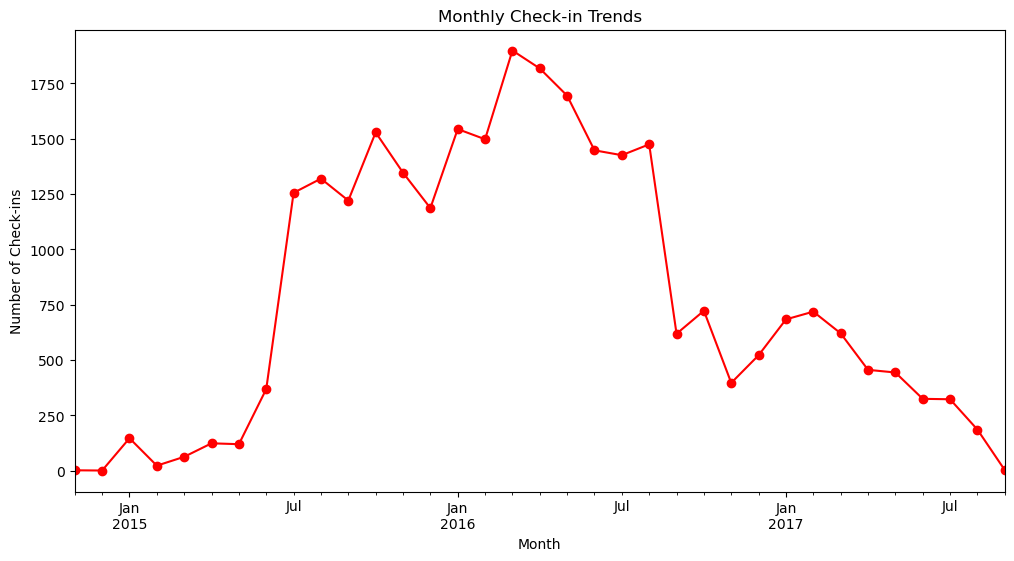

In [61]:
plt.figure(figsize=(12, 6))
train_df.resample('M', on='Expected_checkin').size().plot(kind='line', marker='o', color='red')
plt.title("Monthly Check-in Trends")
plt.xlabel("Month")
plt.ylabel("Number of Check-ins")
plt.savefig("Monthly Check-in Trend", dpi=300, bbox_inches="tight")
plt.show()


In [62]:
train_df.dtypes

Reservation-id                     int64
Gender                            object
Age                                int64
Ethnicity                         object
Educational_Level                 object
Income                             int64
Country_region                    object
Hotel_Type                        object
Expected_checkin          datetime64[ns]
Expected_checkout         datetime64[ns]
Booking_date              datetime64[ns]
Adults                             int64
Children                           int64
Babies                             int32
Meal_Type                         object
Visted_Previously                 object
Previous_Cancellations            object
Deposit_type                      object
Booking_channel                   object
Required_Car_Parking              object
Reservation_Status                object
Use_Promotion                     object
Discount_Rate                      int64
Room_Rate                        float64
dtype: object

In [63]:
train_df['Babies'] = train_df['Babies'].astype(int)

In [64]:
from scipy.stats import zscore
z_scores = np.abs(train_df[numeric_cols].apply(zscore))
outlier_rows = (z_scores > 3).any(axis=1)
print(f"Total outliers detected using Z-score: {outlier_rows.sum()}")


Total outliers detected using Z-score: 0


In [66]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['Gender'] = label_encoder.fit_transform(train_df['Gender'])

In [67]:
train_df = pd.get_dummies(train_df, columns=['Ethnicity'], prefix='Ethnicity')

In [68]:
education_mapping = {
    'Mid-School': 0,
    'High-School': 1,
    'College': 2,
    'Grad': 3
}
train_df['Educational_Level'] = train_df['Educational_Level'].map(education_mapping)

In [69]:
train_df = pd.get_dummies(train_df, columns=['Country_region'], prefix='Country')

In [70]:
train_df = pd.get_dummies(train_df, columns=['Hotel_Type'], prefix='Hotel')

In [71]:
train_df = pd.get_dummies(train_df, columns=['Meal_Type'], prefix='Meal')

In [72]:
train_df['Visted_Previously'] = train_df['Visted_Previously'].map({'Yes': 1, 'No': 0})

In [73]:
train_df['Previous_Cancellations'] = train_df['Previous_Cancellations'].map({'Yes': 1, 'No': 0})

In [74]:
train_df = pd.get_dummies(train_df, columns=['Deposit_type'], prefix='Deposit')

In [75]:
train_df = pd.get_dummies(train_df, columns=['Booking_channel'], prefix='Channel')

In [76]:
train_df['Required_Car_Parking'] = train_df['Required_Car_Parking'].map({'Yes': 1, 'No': 0})

In [77]:
print(train_df['Reservation_Status'].unique())

['check-out' 'canceled' 'no-show']


In [78]:
train_df['Reservation_Status'].value_counts()

Reservation_Status
check-out    21240
canceled      4134
no-show       2125
Name: count, dtype: int64

In [79]:
train_df['Reservation_Status'] = train_df['Reservation_Status'].map({
    'check-out': 1, 
    'canceled': 2, 
    'no-show': 3
})

In [80]:
train_df['Reservation_Status'].value_counts()

Reservation_Status
1    21240
2     4134
3     2125
Name: count, dtype: int64

In [82]:
train_df['Use_Promotion'] = train_df['Use_Promotion'].map({'Yes': 1, 'No': 0})

In [83]:
train_df.dtypes

Reservation-id                         int64
Gender                                 int32
Age                                    int64
Educational_Level                      int64
Income                                 int64
Expected_checkin              datetime64[ns]
Expected_checkout             datetime64[ns]
Booking_date                  datetime64[ns]
Adults                                 int64
Children                               int64
Babies                                 int32
Visted_Previously                      int64
Previous_Cancellations                 int64
Required_Car_Parking                   int64
Reservation_Status                     int64
Use_Promotion                          int64
Discount_Rate                          int64
Room_Rate                            float64
Ethnicity_African American              bool
Ethnicity_Asian American                bool
Ethnicity_Latino                        bool
Ethnicity_caucasian                     bool
Country_Ea

In [84]:
train_df['Checkin_Year'] = train_df['Expected_checkin'].dt.year
train_df['Checkin_Month'] = train_df['Expected_checkin'].dt.month
train_df['Checkin_Weekday'] = train_df['Expected_checkin'].dt.weekday

train_df['Checkout_Year'] = train_df['Expected_checkout'].dt.year
train_df['Checkout_Month'] = train_df['Expected_checkout'].dt.month
train_df['Checkout_Weekday'] = train_df['Expected_checkout'].dt.weekday

train_df['Booking_Year'] = train_df['Booking_date'].dt.year
train_df['Booking_Month'] = train_df['Booking_date'].dt.month
train_df['Booking_Weekday'] = train_df['Booking_date'].dt.weekday



In [85]:
train_df['Stay_Duration'] = (train_df['Expected_checkout'] - train_df['Expected_checkin']).dt.days

In [86]:
train_df.head()

,Reservation-id,Gender,Age,Educational_Level,Income,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,...,Checkin_Year,Checkin_Month,Checkin_Weekday,Checkout_Year,Checkout_Month,Checkout_Weekday,Booking_Year,Booking_Month,Booking_Weekday,Stay_Duration
0,39428300,1,40,1,0,2015-07-01,2015-07-02,2015-05-21,4,2,...,2015,7,2,2015,7,3,2015,5,3,1
1,77491756,0,49,1,2,2015-07-01,2015-07-02,2015-05-26,1,3,...,2015,7,2,2015,7,3,2015,5,1,1
2,73747291,0,42,2,0,2015-07-02,2015-07-06,2015-06-29,1,3,...,2015,7,3,2015,7,0,2015,6,0,4
3,67301739,1,25,1,3,2015-07-02,2015-07-03,2015-06-20,3,3,...,2015,7,3,2015,7,4,2015,6,5,1
4,77222321,0,62,3,1,2015-07-03,2015-07-04,2015-06-20,1,1,...,2015,7,4,2015,7,5,2015,6,5,1


In [87]:
train_df.dtypes

Reservation-id                         int64
Gender                                 int32
Age                                    int64
Educational_Level                      int64
Income                                 int64
Expected_checkin              datetime64[ns]
Expected_checkout             datetime64[ns]
Booking_date                  datetime64[ns]
Adults                                 int64
Children                               int64
Babies                                 int32
Visted_Previously                      int64
Previous_Cancellations                 int64
Required_Car_Parking                   int64
Reservation_Status                     int64
Use_Promotion                          int64
Discount_Rate                          int64
Room_Rate                            float64
Ethnicity_African American              bool
Ethnicity_Asian American                bool
Ethnicity_Latino                        bool
Ethnicity_caucasian                     bool
Country_Ea

In [88]:
train_df.drop(columns=['Expected_checkin', 'Expected_checkout', 'Booking_date'], inplace=True)
train_df.drop(columns=['Reservation-id'], inplace=True)

In [89]:
train_df[train_df.select_dtypes(include='bool').columns] = train_df.select_dtypes(include='bool').astype(int)

In [90]:
train_df.dtypes

Gender                          int32
Age                             int64
Educational_Level               int64
Income                          int64
Adults                          int64
Children                        int64
Babies                          int32
Visted_Previously               int64
Previous_Cancellations          int64
Required_Car_Parking            int64
Reservation_Status              int64
Use_Promotion                   int64
Discount_Rate                   int64
Room_Rate                     float64
Ethnicity_African American      int32
Ethnicity_Asian American        int32
Ethnicity_Latino                int32
Ethnicity_caucasian             int32
Country_East                    int32
Country_North                   int32
Country_South                   int32
Country_West                    int32
Hotel_Airport Hotels            int32
Hotel_City Hotel                int32
Hotel_Resort                    int32
Meal_BB                         int32
Meal_FB     

## Part 1 (a) Hypothesis Testing

#### Hypothesis 1: Gender Affect Reservation Status.
##### Test: Chi-Square Test for Independence (as both variables are categorical)
##### Null Hypothesis (H0): Gender has no significant impact on reservation status.

##### Alternative Hypothesis (H1): Gender has a significant impact on reservation status.

In [93]:
from scipy.stats import chi2_contingency

gender_reservation_ct = pd.crosstab(train_df['Gender'], train_df['Reservation_Status'])

chi2_stat, p_value, dof, expected = chi2_contingency(gender_reservation_ct)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Gender significantly affects reservation status.")
else:
    print("Fail to reject the null hypothesis: Gender does not significantly affect reservation status.")


Chi-Square Statistic: 928.6083083862254
P-value: 2.2660417606771193e-202
Reject the null hypothesis: Gender significantly affects reservation status.


#### Hypothesis 2: People with Previous Cancellations Tend to Cancel Again
##### Test: Chi-Square Test for Independence
##### Null Hypothesis (H0): Previous cancellations do not affect future cancellations.
##### Alternative Hypothesis (H1): Previous cancellations increase the likelihood of future cancellations.

In [95]:
prev_cancel_ct = pd.crosstab(train_df['Previous_Cancellations'], train_df['Reservation_Status'])

chi2_stat, p_value, dof, expected = chi2_contingency(prev_cancel_ct)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Previous cancellations significantly impact future cancellations.")
else:
    print("Fail to reject the null hypothesis: Previous cancellations do not significantly impact future cancellations.")


Chi-Square Statistic: 2.0816822245127486
P-value: 0.3531575118879262
Fail to reject the null hypothesis: Previous cancellations do not significantly impact future cancellations.


#### Hypothesis 3: Using a Promotion influence Cancellations.
##### Test: Chi-Square Test for Independence
##### Null Hypothesis (H0): Promotions do not influence cancellation rates.
##### Alternative Hypothesis (H1): TPromotions increase cancellation rates.

In [97]:
promotion_ct = pd.crosstab(train_df['Use_Promotion'], train_df['Reservation_Status'])

chi2_stat, p_value, dof, expected = chi2_contingency(promotion_ct)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Using a promotion significantly affects cancellation rates.")
else:
    print("Fail to reject the null hypothesis: Using a promotion does not significantly affect cancellation rates.")


Chi-Square Statistic: 9969.046150107813
P-value: 0.0
Reject the null hypothesis: Using a promotion significantly affects cancellation rates.


#### Hypothesis 4: Different Hotel Types Charge Different Room Rates
##### Test: ANOVA
##### Null Hypothesis (H0): The mean room rates are the same for all hotel types.
##### Alternative Hypothesis (H1): At least one hotel type has a significantly different room rate.

In [99]:
from scipy.stats import f_oneway

airport_hotels = train_df[train_df["Hotel_Airport Hotels"] == 1]["Room_Rate"]
city_hotels = train_df[train_df["Hotel_City Hotel"] == 1]["Room_Rate"]
resort_hotels = train_df[train_df["Hotel_Resort"] == 1]["Room_Rate"]

f_stat, p_value = f_oneway(airport_hotels, city_hotels, resort_hotels)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: At least one hotel type has a significantly different room rate.")
else:
    print("Fail to reject the null hypothesis: No significant difference in room rates among hotel types.")


F-statistic: 1168.6072238433744
P-value: 0.0
Reject the null hypothesis: At least one hotel type has a significantly different room rate.


#### Hypothesis 5: Customers from Different Regions Have Different Income Levels
##### Test: ANOVA
##### Null Hypothesis (H0): The mean income is the same across different regions.
##### Alternative Hypothesis (H1): At least one region has a significantly different mean income.

In [101]:
north_income = train_df[train_df["Country_North"] == 1]["Income"]
south_income = train_df[train_df["Country_South"] == 1]["Income"]
east_income = train_df[train_df["Country_East"] == 1]["Income"]
west_income = train_df[train_df["Country_West"] == 1]["Income"]

f_stat, p_value = f_oneway(north_income, south_income, east_income, west_income)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: At least one region has a significantly different mean income.")
else:
    print("Fail to reject the null hypothesis: No significant difference in income among regions.")


F-statistic: 3.4272820857284856
P-value: 0.01632918140107982
Reject the null hypothesis: At least one region has a significantly different mean income.


#### Hypothesis 6: People Who Visit Previously Spend More?
##### Test: Independent t-test
##### Null Hypothesis (H0): There is no significant difference in room rate between previous and new visitors.
##### Alternative Hypothesis (H1): Previous visitors tend to spend more (or less).

In [103]:
from scipy.stats import ttest_ind

visited_before = train_df[train_df["Visted_Previously"] == 1]["Room_Rate"]
new_visitors = train_df[train_df["Visted_Previously"] == 0]["Room_Rate"]

t_stat, p_value = ttest_ind(visited_before, new_visitors, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Previous visitors spend differently compared to new visitors.")
else:
    print("Fail to reject the null hypothesis: No significant difference in spending between previous and new visitors.")


T-statistic: -0.7888953510841191
P-value: 0.4301834600433243
Fail to reject the null hypothesis: No significant difference in spending between previous and new visitors.


## Part 1 (b) Key Factors Leading to Cancellations & No-Shows

In [105]:
cancellation_no_show_rates = train_df['Reservation_Status'].value_counts(normalize=True) * 100
print(cancellation_no_show_rates)

Reservation_Status
1    77.239172
2    15.033274
3     7.727554
Name: proportion, dtype: float64


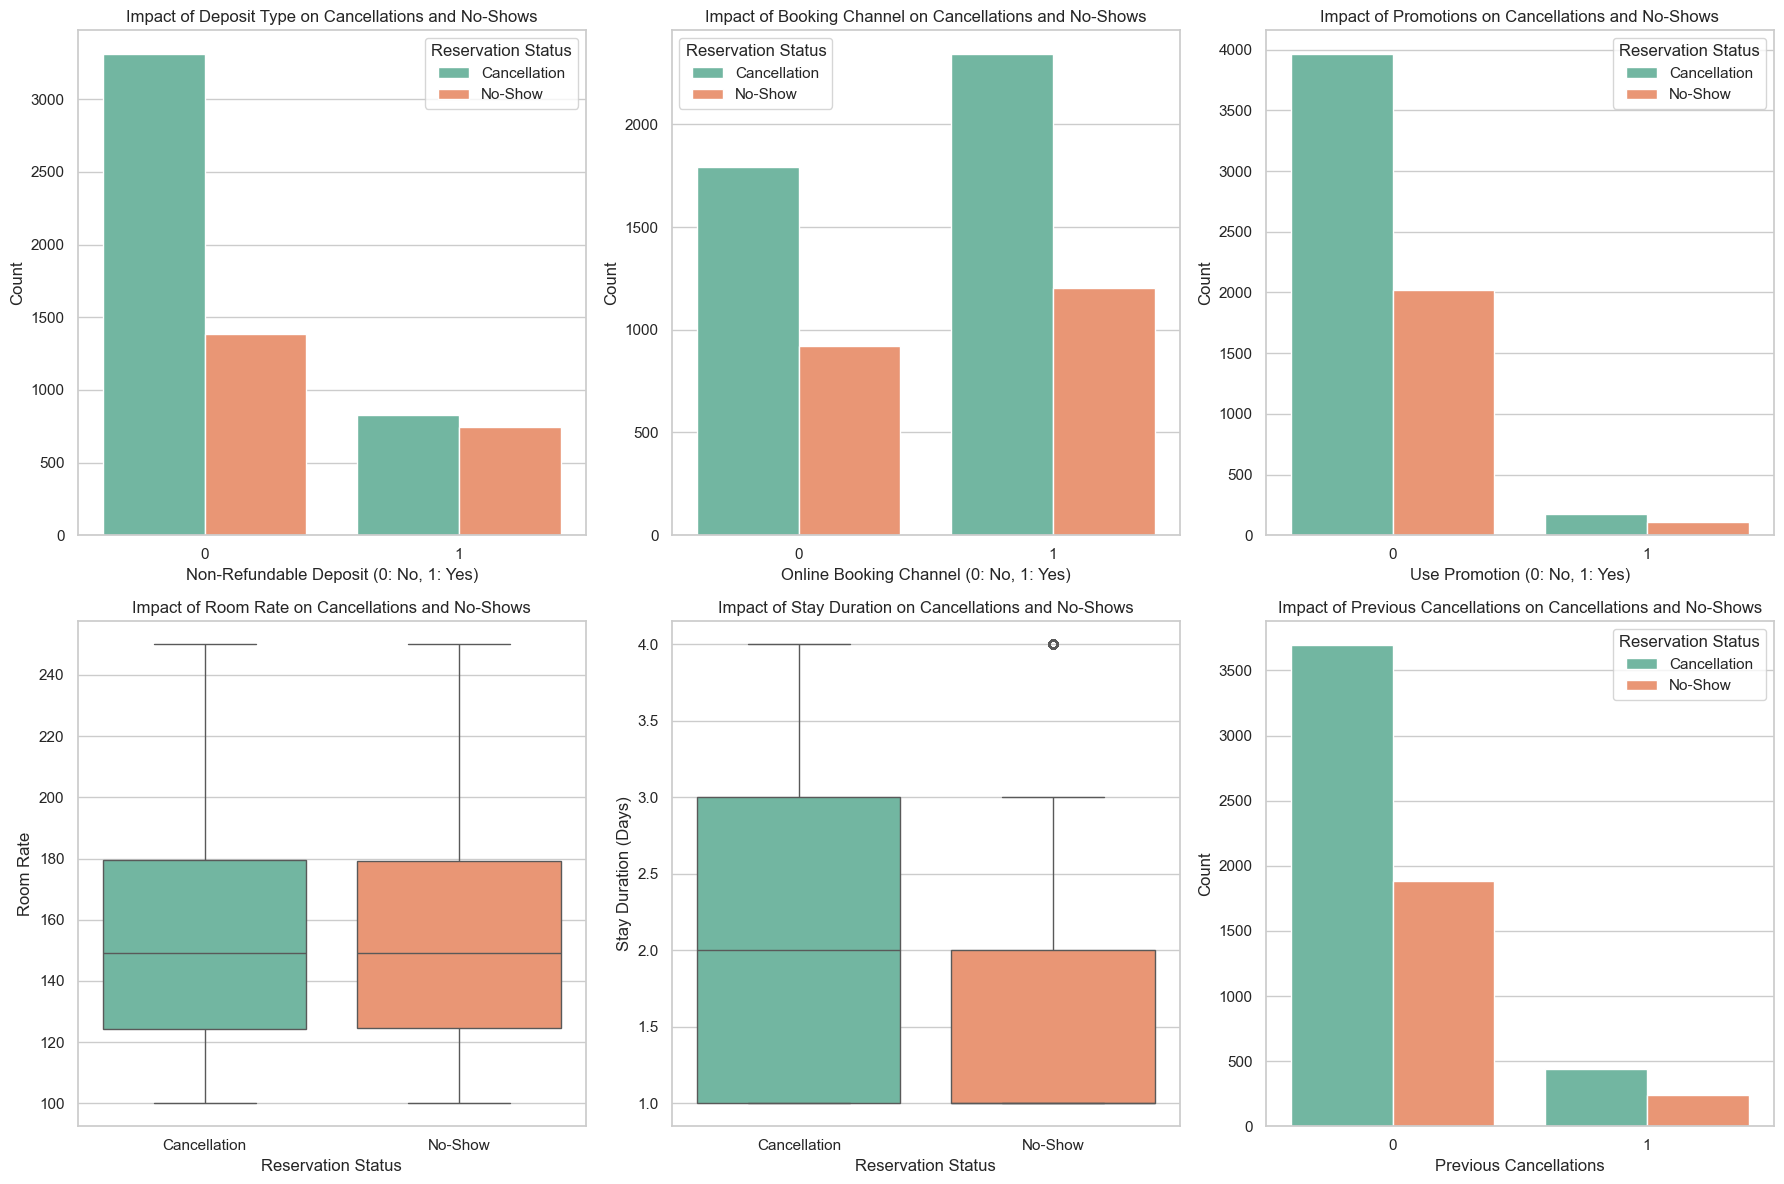

In [106]:
df_filtered = train_df[train_df['Reservation_Status'].isin([2, 3])]

sns.set(style="whitegrid")
palette = "Set2"

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  

axes = axes.flatten()

sns.countplot(data=df_filtered, x='Deposit_Non-Refundable', hue='Reservation_Status', palette=palette, ax=axes[0])
axes[0].set_title("Impact of Deposit Type on Cancellations and No-Shows")
axes[0].set_xlabel("Non-Refundable Deposit (0: No, 1: Yes)")
axes[0].set_ylabel("Count")
axes[0].legend(title="Reservation Status", labels=["Cancellation", "No-Show"])

sns.countplot(data=df_filtered, x='Channel_Online', hue='Reservation_Status', palette=palette, ax=axes[1])
axes[1].set_title("Impact of Booking Channel on Cancellations and No-Shows")
axes[1].set_xlabel("Online Booking Channel (0: No, 1: Yes)")
axes[1].set_ylabel("Count")
axes[1].legend(title="Reservation Status", labels=["Cancellation", "No-Show"])

sns.countplot(data=df_filtered, x='Use_Promotion', hue='Reservation_Status', palette=palette, ax=axes[2])
axes[2].set_title("Impact of Promotions on Cancellations and No-Shows")
axes[2].set_xlabel("Use Promotion (0: No, 1: Yes)")
axes[2].set_ylabel("Count")
axes[2].legend(title="Reservation Status", labels=["Cancellation", "No-Show"])

sns.boxplot(data=df_filtered, x='Reservation_Status', y='Room_Rate', palette=palette, ax=axes[3])
axes[3].set_title("Impact of Room Rate on Cancellations and No-Shows")
axes[3].set_xlabel("Reservation Status")
axes[3].set_ylabel("Room Rate")
axes[3].set_xticklabels(["Cancellation", "No-Show"])

sns.boxplot(data=df_filtered, x='Reservation_Status', y='Stay_Duration', palette=palette, ax=axes[4])
axes[4].set_title("Impact of Stay Duration on Cancellations and No-Shows")
axes[4].set_xlabel("Reservation Status")
axes[4].set_ylabel("Stay Duration (Days)")
axes[4].set_xticklabels(["Cancellation", "No-Show"])

sns.countplot(data=df_filtered, x='Previous_Cancellations', hue='Reservation_Status', palette=palette, ax=axes[5])
axes[5].set_title("Impact of Previous Cancellations on Cancellations and No-Shows")
axes[5].set_xlabel("Previous Cancellations")
axes[5].set_ylabel("Count")
axes[5].legend(title="Reservation Status", labels=["Cancellation", "No-Show"])

plt.tight_layout()
plt.savefig("cancellations_analysis.png", dpi=300, bbox_inches='tight')  
plt.show()

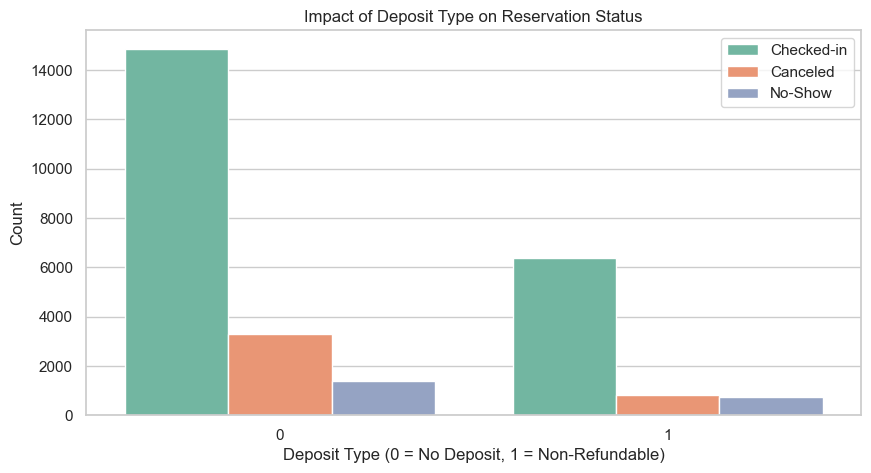

In [107]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Deposit_Non-Refundable', hue='Reservation_Status', data=train_df, palette="Set2")
plt.title("Impact of Deposit Type on Reservation Status")
plt.xlabel("Deposit Type (0 = No Deposit, 1 = Non-Refundable)")
plt.ylabel("Count")
plt.legend(["Checked-in", "Canceled", "No-Show"])
plt.savefig("Impact of Deposit Type on Reservation Status", dpi=300, bbox_inches="tight")
plt.show()


## Part 1 (c)  Calculate revenue loss due to cancellations and no-shows from the historical data

In [110]:
Revenue_Loss = train_df["Room_Rate"] * train_df["Stay_Duration"]

In [111]:
train_df["Reservation_Status"].head()


0    1
1    1
2    1
3    1
4    1
Name: Reservation_Status, dtype: int64

In [112]:
canceled_no_show = train_df[train_df["Reservation_Status"].isin([2, 3])]

canceled_no_show["Revenue_Loss"] = canceled_no_show["Room_Rate"] * canceled_no_show["Stay_Duration"]

total_revenue_loss = canceled_no_show["Revenue_Loss"].sum()
print(f"Total Revenue Loss Due to Cancellations and No-Shows: ${total_revenue_loss:.2f}")


Total Revenue Loss Due to Cancellations and No-Shows: $1775083.43


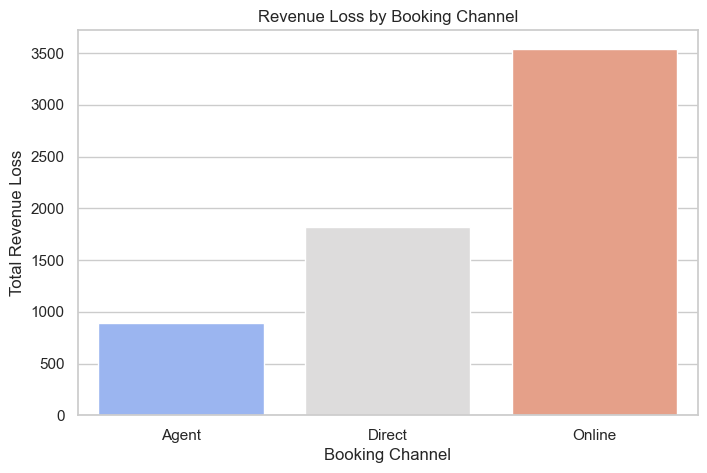

In [113]:
plt.figure(figsize=(8, 5))
sns.barplot(x=["Agent", "Direct", "Online"], 
            y=[canceled_no_show["Channel_Agent"].sum(), 
               canceled_no_show["Channel_Direct"].sum(), 
               canceled_no_show["Channel_Online"].sum()], 
            palette="coolwarm")
plt.xlabel("Booking Channel")
plt.ylabel("Total Revenue Loss")
plt.title("Revenue Loss by Booking Channel")
plt.show()


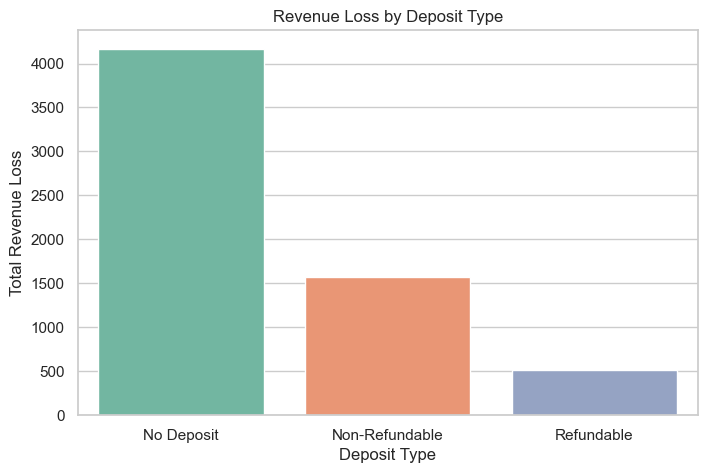

In [114]:
plt.figure(figsize=(8, 5))
sns.barplot(x=["No Deposit", "Non-Refundable", "Refundable"], 
            y=[canceled_no_show["Deposit_No Deposit"].sum(), 
               canceled_no_show["Deposit_Non-Refundable"].sum(), 
               canceled_no_show["Deposit_Refundable"].sum()], 
            palette="Set2")
plt.xlabel("Deposit Type")
plt.ylabel("Total Revenue Loss")
plt.title("Revenue Loss by Deposit Type")
plt.show()

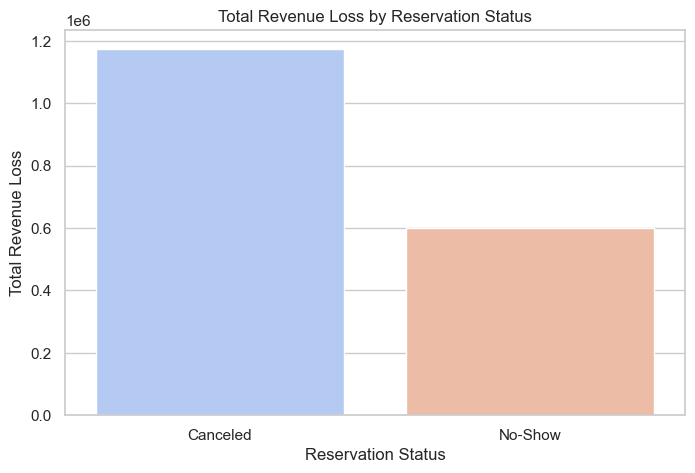

In [116]:
plt.figure(figsize=(8, 5))
sns.barplot(x=["Canceled", "No-Show"], 
            y=[canceled_no_show[canceled_no_show["Reservation_Status"] == 2]["Revenue_Loss"].sum(),
               canceled_no_show[canceled_no_show["Reservation_Status"] == 3]["Revenue_Loss"].sum()], 
            palette="coolwarm")

plt.xlabel("Reservation Status")
plt.ylabel("Total Revenue Loss")
plt.title("Total Revenue Loss by Reservation Status")
plt.savefig("Total Revenue Loss by Reservation Status", dpi=300, bbox_inches="tight")
plt.show()

#### Saving the preprocessed Train Data

In [118]:
train_df.to_csv('preprocessed_train_dataset.csv', index=False)

### Performing the Same Preprocessing Steps of Validation Data Set

In [121]:
validate_df = pd.read_csv("./Hotel-A-validation.csv")

In [122]:
validate_df.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,45716350,M,56,Latino,College,<25K,West,City Hotel,2016-08-31,2016-09-02,...,HB,No,No,No Deposit,Agent,No,no-show,No,5,184.382579
1,88857401,M,60,caucasian,Mid-School,25K --50K,West,City Hotel,2016-08-31,2016-09-04,...,FB,Yes,No,No Deposit,Online,Yes,canceled,No,20,203.886849
2,16074440,F,58,Asian American,High-School,<25K,North,Resort,2016-09-01,2016-09-02,...,FB,No,No,Non-Refundable,Direct,No,canceled,No,25,227.000000
3,10992124,F,23,caucasian,High-School,25K --50K,East,Airport Hotels,2016-08-31,2016-09-02,...,FB,Yes,No,Refundable,Direct,No,check-in,Yes,20,162.935397
4,15934351,F,47,Asian American,College,25K --50K,South,Resort,2016-08-31,2016-09-01,...,HB,Yes,No,Non-Refundable,Online,Yes,check-in,Yes,25,218.000000


In [123]:
validate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Reservation-id          2749 non-null   int64  
 1   Gender                  2749 non-null   object 
 2   Age                     2749 non-null   int64  
 3   Ethnicity               2749 non-null   object 
 4   Educational_Level       2749 non-null   object 
 5   Income                  2749 non-null   object 
 6   Country_region          2749 non-null   object 
 7   Hotel_Type              2749 non-null   object 
 8   Expected_checkin        2749 non-null   object 
 9   Expected_checkout       2749 non-null   object 
 10  Booking_date            2749 non-null   object 
 11  Adults                  2749 non-null   int64  
 12  Children                2749 non-null   int64  
 13  Babies                  2337 non-null   float64
 14  Meal_Type               2749 non-null   

In [124]:
validate_df.dtypes

Reservation-id              int64
Gender                     object
Age                         int64
Ethnicity                  object
Educational_Level          object
Income                     object
Country_region             object
Hotel_Type                 object
Expected_checkin           object
Expected_checkout          object
Booking_date               object
Adults                      int64
Children                    int64
Babies                    float64
Meal_Type                  object
Visted_Previously          object
Previous_Cancellations     object
Deposit_type               object
Booking_channel            object
Required_Car_Parking       object
Reservation_Status         object
Use_Promotion              object
Discount_Rate               int64
Room_Rate                 float64
dtype: object

In [125]:
validate_df.duplicated().sum()

0

In [126]:
validate_df.isna().sum()

Reservation-id              0
Gender                      0
Age                         0
Ethnicity                   0
Educational_Level           0
Income                      0
Country_region              0
Hotel_Type                  0
Expected_checkin            0
Expected_checkout           0
Booking_date                0
Adults                      0
Children                    0
Babies                    412
Meal_Type                   0
Visted_Previously           0
Previous_Cancellations      0
Deposit_type                0
Booking_channel             0
Required_Car_Parking        0
Reservation_Status          0
Use_Promotion               0
Discount_Rate               0
Room_Rate                   0
dtype: int64

In [127]:
missing_percentage = validate_df.isnull().mean() * 100
missing_percentage

Reservation-id             0.000000
Gender                     0.000000
Age                        0.000000
Ethnicity                  0.000000
Educational_Level          0.000000
Income                     0.000000
Country_region             0.000000
Hotel_Type                 0.000000
Expected_checkin           0.000000
Expected_checkout          0.000000
Booking_date               0.000000
Adults                     0.000000
Children                   0.000000
Babies                    14.987268
Meal_Type                  0.000000
Visted_Previously          0.000000
Previous_Cancellations     0.000000
Deposit_type               0.000000
Booking_channel            0.000000
Required_Car_Parking       0.000000
Reservation_Status         0.000000
Use_Promotion              0.000000
Discount_Rate              0.000000
Room_Rate                  0.000000
dtype: float64

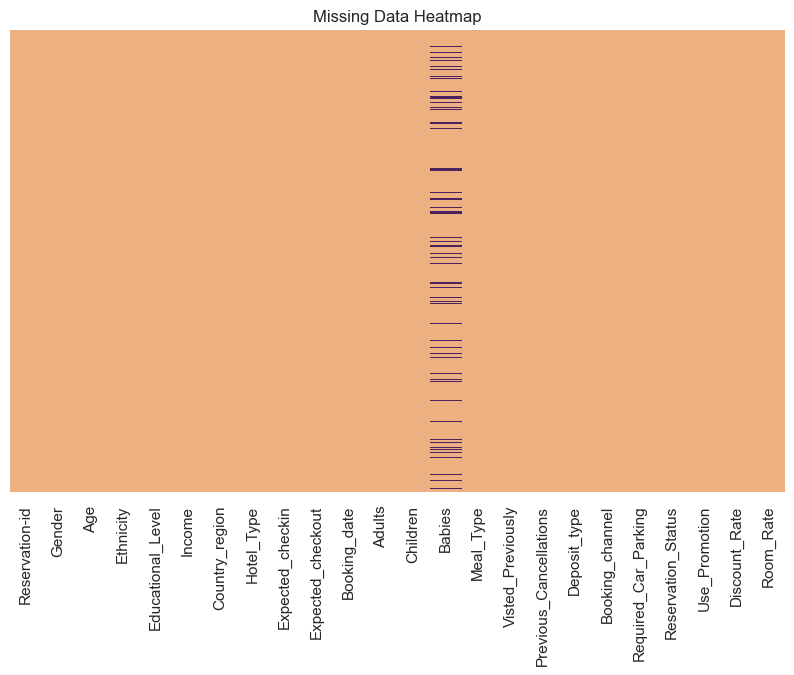

In [128]:
plt.figure(figsize=(10,6)) 
sns.heatmap(validate_df.isnull(), cmap='flare', cbar=False, yticklabels=False) 
plt.title("Missing Data Heatmap") 
plt.show() 

In [129]:
validate_df[['Babies']] = imputer.transform(validate_df[['Babies']])

In [130]:
validate_df["Babies"] = validate_df["Babies"].astype(int) 

In [131]:
validate_df["Babies"].value_counts()

Babies
0    2061
1     511
2     177
Name: count, dtype: int64

In [132]:
validate_df["Expected_checkin"] = pd.to_datetime(validate_df["Expected_checkin"])
validate_df["Expected_checkout"] = pd.to_datetime(validate_df["Expected_checkout"])
validate_df["Booking_date"] = pd.to_datetime(validate_df["Booking_date"])

In [133]:
income_mapping = {
    "<25K": 0,
    "25K --50K": 1,
    "50K -- 100K": 2,
    ">100K": 3
}
validate_df["Income"] = validate_df["Income"].map(income_mapping)

In [134]:
validate_df["Income"].value_counts()

Income
2    786
0    785
1    778
3    400
Name: count, dtype: int64

In [135]:
validate_df['Gender'] = label_encoder.transform(validate_df['Gender'])

In [136]:
validate_df["Gender"].value_counts()

Gender
0    1453
1    1296
Name: count, dtype: int64

In [137]:
validate_df['Reservation_Status'].value_counts()

Reservation_Status
check-in    1610
canceled     741
no-show      398
Name: count, dtype: int64

In [138]:
validate_df = pd.get_dummies(validate_df, columns=['Ethnicity'], prefix='Ethnicity')
validate_df = pd.get_dummies(validate_df, columns=['Country_region'], prefix='Country')
validate_df = pd.get_dummies(validate_df, columns=['Hotel_Type'], prefix='Hotel')
validate_df = pd.get_dummies(validate_df, columns=['Meal_Type'], prefix='Meal')
validate_df = pd.get_dummies(validate_df, columns=['Deposit_type'], prefix='Deposit')
validate_df = pd.get_dummies(validate_df, columns=['Booking_channel'], prefix='Channel')

validate_df['Reservation_Status'] = validate_df['Reservation_Status'].map({
    'check-in': 1, 
    'canceled': 2, 
    'no-show': 3
})

In [139]:
education_mapping = {
    'Mid-School': 0,
    'High-School': 1,
    'College': 2,
    'Grad': 3
}
validate_df['Educational_Level'] = validate_df['Educational_Level'].map(education_mapping)


In [140]:
validate_df['Visted_Previously'] = validate_df['Visted_Previously'].map({'Yes': 1, 'No': 0})
validate_df['Previous_Cancellations'] = validate_df['Previous_Cancellations'].map({'Yes': 1, 'No': 0})
validate_df['Required_Car_Parking'] = validate_df['Required_Car_Parking'].map({'Yes': 1, 'No': 0})
validate_df['Use_Promotion'] = validate_df['Use_Promotion'].map({'Yes': 1, 'No': 0})

In [141]:
print(validate_df.columns)

Index(['Reservation-id', 'Gender', 'Age', 'Educational_Level', 'Income',
       'Expected_checkin', 'Expected_checkout', 'Booking_date', 'Adults',
       'Children', 'Babies', 'Visted_Previously', 'Previous_Cancellations',
       'Required_Car_Parking', 'Reservation_Status', 'Use_Promotion',
       'Discount_Rate', 'Room_Rate', 'Ethnicity_African American',
       'Ethnicity_Asian American', 'Ethnicity_Latino', 'Ethnicity_caucasian',
       'Country_East', 'Country_North', 'Country_South', 'Country_West',
       'Hotel_Airport Hotels', 'Hotel_City Hotel', 'Hotel_Resort', 'Meal_BB',
       'Meal_FB', 'Meal_HB', 'Deposit_No Deposit', 'Deposit_Non-Refundable',
       'Deposit_Refundable', 'Channel_Agent', 'Channel_Direct',
       'Channel_Online'],
      dtype='object')


In [142]:
validate_df['Checkin_Year'] = validate_df['Expected_checkin'].dt.year
validate_df['Checkin_Month'] = validate_df['Expected_checkin'].dt.month
validate_df['Checkin_Weekday'] = validate_df['Expected_checkin'].dt.weekday 

validate_df['Checkout_Year'] = validate_df['Expected_checkout'].dt.year
validate_df['Checkout_Month'] = validate_df['Expected_checkout'].dt.month
validate_df['Checkout_Weekday'] = validate_df['Expected_checkout'].dt.weekday

validate_df['Booking_Year'] = validate_df['Booking_date'].dt.year
validate_df['Booking_Month'] = validate_df['Booking_date'].dt.month
validate_df['Booking_Weekday'] = validate_df['Booking_date'].dt.weekday

validate_df['Stay_Duration'] = (validate_df['Expected_checkout'] - validate_df['Expected_checkin']).dt.days


In [143]:
validate_df = validate_df.drop(columns=['Expected_checkin', 'Expected_checkout', 'Booking_date', 'Reservation-id'])

In [144]:
validate_df = validate_df.astype({col: int for col in validate_df.select_dtypes('bool').columns})

In [145]:
validate_df["Reservation_Status"].value_counts()

Reservation_Status
1    1610
2     741
3     398
Name: count, dtype: int64

In [146]:
validate_df["Babies"].value_counts()

Babies
0    2061
1     511
2     177
Name: count, dtype: int64

In [148]:
train_df.shape

(27499, 44)

In [149]:
validate_df.shape

(2749, 44)

In [150]:
train_df.columns

Index(['Gender', 'Age', 'Educational_Level', 'Income', 'Adults', 'Children',
       'Babies', 'Visted_Previously', 'Previous_Cancellations',
       'Required_Car_Parking', 'Reservation_Status', 'Use_Promotion',
       'Discount_Rate', 'Room_Rate', 'Ethnicity_African American',
       'Ethnicity_Asian American', 'Ethnicity_Latino', 'Ethnicity_caucasian',
       'Country_East', 'Country_North', 'Country_South', 'Country_West',
       'Hotel_Airport Hotels', 'Hotel_City Hotel', 'Hotel_Resort', 'Meal_BB',
       'Meal_FB', 'Meal_HB', 'Deposit_No Deposit', 'Deposit_Non-Refundable',
       'Deposit_Refundable', 'Channel_Agent', 'Channel_Direct',
       'Channel_Online', 'Checkin_Year', 'Checkin_Month', 'Checkin_Weekday',
       'Checkout_Year', 'Checkout_Month', 'Checkout_Weekday', 'Booking_Year',
       'Booking_Month', 'Booking_Weekday', 'Stay_Duration'],
      dtype='object')

In [151]:
validate_df.columns

Index(['Gender', 'Age', 'Educational_Level', 'Income', 'Adults', 'Children',
       'Babies', 'Visted_Previously', 'Previous_Cancellations',
       'Required_Car_Parking', 'Reservation_Status', 'Use_Promotion',
       'Discount_Rate', 'Room_Rate', 'Ethnicity_African American',
       'Ethnicity_Asian American', 'Ethnicity_Latino', 'Ethnicity_caucasian',
       'Country_East', 'Country_North', 'Country_South', 'Country_West',
       'Hotel_Airport Hotels', 'Hotel_City Hotel', 'Hotel_Resort', 'Meal_BB',
       'Meal_FB', 'Meal_HB', 'Deposit_No Deposit', 'Deposit_Non-Refundable',
       'Deposit_Refundable', 'Channel_Agent', 'Channel_Direct',
       'Channel_Online', 'Checkin_Year', 'Checkin_Month', 'Checkin_Weekday',
       'Checkout_Year', 'Checkout_Month', 'Checkout_Weekday', 'Booking_Year',
       'Booking_Month', 'Booking_Weekday', 'Stay_Duration'],
      dtype='object')

In [152]:
validate_df["Reservation_Status"].value_counts()

Reservation_Status
1    1610
2     741
3     398
Name: count, dtype: int64

In [153]:
train_df["Reservation_Status"].value_counts()

Reservation_Status
1    21240
2     4134
3     2125
Name: count, dtype: int64

In [154]:
validate_df.to_csv('preprocessed_validation_dataset.csv', index=False)

In [156]:
x1 = pd.read_csv("./preprocessed_validation_dataset.csv")

In [157]:
train_df.to_csv('preprocessed_Training_dataset.csv', index=False)

In [158]:
validate_df.dtypes

Gender                          int32
Age                             int64
Educational_Level               int64
Income                          int64
Adults                          int64
Children                        int64
Babies                          int32
Visted_Previously               int64
Previous_Cancellations          int64
Required_Car_Parking            int64
Reservation_Status              int64
Use_Promotion                   int64
Discount_Rate                   int64
Room_Rate                     float64
Ethnicity_African American      int32
Ethnicity_Asian American        int32
Ethnicity_Latino                int32
Ethnicity_caucasian             int32
Country_East                    int32
Country_North                   int32
Country_South                   int32
Country_West                    int32
Hotel_Airport Hotels            int32
Hotel_City Hotel                int32
Hotel_Resort                    int32
Meal_BB                         int32
Meal_FB     

In [159]:
validate_df.shape

(2749, 44)

In [160]:
train_df.shape

(27499, 44)